# Q0. Explore the data

## Q0.0 Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import base64
import io
import json
import mimetypes
import pathlib
import pprint
import requests


file_path = './ad_click_dataset.csv'
df = pd.read_csv(file_path)

In [3]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)



## Q0.1 Explore the data

In [6]:

# 1. Initial Data Overview
print("Dataset Shape:", df.shape)
print("\nData Info:")
df.info()

# 2. Check for Duplicates
print("\n=== Duplicate Analysis ===")
# Check for exact duplicates
exact_duplicates = df.duplicated().sum()
print(f"Exact duplicates: {exact_duplicates}")

# Check for potential duplicates based on all columns except 'id'
potential_duplicates = df.drop('id', axis=1).duplicated().sum()
print(f"Potential duplicates (excluding id): {potential_duplicates}")

# Check for duplicate ids
duplicate_ids = df['id'].duplicated().sum()
print(f"Duplicate IDs: {duplicate_ids}")

# 3. Missing Values Analysis
print("\n=== Missing Values Analysis ===")
missing_analysis = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing_analysis)

# 4. Data Validation
print("\n=== Data Validation ===")
# Check click values
print("\nClick value distribution:")
print(df['click'].value_counts(dropna=False))

# Check ad positions
print("\nAd position distribution:")
print(df['ad_position'].value_counts(dropna=False))



Dataset Shape: (10000, 9)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB

=== Duplicate Analysis ===
Exact duplicates: 2853
Potential duplicates (excluding id): 2853
Duplicate IDs: 6000

=== Missing Values Analysis ===
                  Missing Count  Missing Percentage
id                            0               0.000
full_name               

In [7]:
def explore_dataset(df, title="Dataset Analysis"):
    """
    Performs comprehensive analysis of a dataset including duplicates, missing values, and data validation.
    
    Args:
        df (pandas.DataFrame): The dataframe to analyze
        title (str): Title for the analysis output
    """
    print(f"\n{'='*20} {title} {'='*20}")
    
    # 1. Initial Data Overview
    print("\nDataset Shape:", df.shape)
    print("\nData Info:")
    df.info()

    # 2. Check for Duplicates
    print("\n=== Duplicate Analysis ===")
    exact_duplicates = df.duplicated().sum()
    potential_duplicates = df.drop('id', axis=1).duplicated().sum()
    duplicate_ids = df['id'].duplicated().sum()
    
    print(f"Exact duplicates: {exact_duplicates}")
    print(f"Potential duplicates (excluding id): {potential_duplicates}")
    print(f"Duplicate IDs: {duplicate_ids}")

    # 3. Missing Values Analysis
    print("\n=== Missing Values Analysis ===")
    missing_analysis = pd.DataFrame({
        'Missing Count': df.isnull().sum(),
        'Missing Percentage': (df.isnull().sum() / len(df) * 100).round(2)
    })
    print(missing_analysis)

    # 4. Data Validation
    print("\n=== Data Validation ===")
    print("\nClick value distribution:")
    print(df['click'].value_counts(dropna=False))
    
    print("\nAd position distribution:")
    print(df['ad_position'].value_counts(dropna=False))

# 사용 예시:
# analyze_dataset(df, "Original Dataset")
# analyze_dataset(df_clean, "Cleaned Dataset")

In [8]:
explore_dataset(df, "Original Dataset")


==================== Original Dataset ====================

Dataset Shape: (10000, 9)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB

=== Duplicate Analysis ===
Exact duplicates: 2853
Potential duplicates (excluding id): 2853
Duplicate IDs: 6000

=== Missing Values Analysis ===
                  Missing Count  Missing Percentage
id             

## Q0.2 Clean Data

In [9]:


# 9. Recommendations for Clean CTR Analysis
def get_clean_data_for_ctr():
    """
    Returns a cleaned dataset for CTR analysis based on quality criteria
    """
    df_clean = df.copy()
    
    df_clean = df_clean.drop_duplicates()
    
    return df_clean

df_clean = get_clean_data_for_ctr()

# Save the clean dataset
clean_filename = 'ad_click_dataset_clean.csv'
df_clean.to_csv(clean_filename, index=False)
print(f"Cleaned data saved under: '{clean_filename}'")
print(f"- Original row count: {len(df):,}")
print(f"- Cleaned row count: {len(df_clean):,}")

Cleaned data saved under: 'ad_click_dataset_clean.csv'
- Original row count: 10,000
- Cleaned row count: 7,147


In [10]:
explore_dataset(df_clean, "Cleaned Dataset")


==================== Cleaned Dataset ====================

Dataset Shape: (7147, 9)

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 7147 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7147 non-null   int64  
 1   full_name         7147 non-null   object 
 2   age               3671 non-null   float64
 3   gender            3747 non-null   object 
 4   device_type       5419 non-null   object 
 5   ad_position       5404 non-null   object 
 6   browsing_history  3667 non-null   object 
 7   time_of_day       5435 non-null   object 
 8   click             7147 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 558.4+ KB

=== Duplicate Analysis ===
Exact duplicates: 0
Potential duplicates (excluding id): 0
Duplicate IDs: 3147

=== Missing Values Analysis ===
                  Missing Count  Missing Percentage
id                           

In [11]:
# Create Data Quality Score
print("\n=== Data Quality Score ===")
df_clean['data_quality_score'] = df_clean.apply(lambda x: sum([
    not pd.isnull(x['age']),
    not pd.isnull(x['gender']),
    not pd.isnull(x['device_type']),
    not pd.isnull(x['ad_position']),
    not pd.isnull(x['browsing_history']),
    not pd.isnull(x['time_of_day']
]), axis=1)

print("\nData quality score distribution:")
print(df_clean['data_quality_score'].value_counts(normalize=True).sort_index() * 100)

df_clean.to_csv('ad_click_clean_dataset_quality.csv', index=False)


=== Data Quality Score ===

Data quality score distribution:
data_quality_score
0    0.098
1    1.805
2   10.298
3   25.577
4   33.818
5   22.247
6    6.156
Name: proportion, dtype: float64


## Q0.3 Make Observations

Of the original dataset, 2853 rows are duplicates and were removed.
There are missing values but they are in clusters
  - 0% missing: id, full_name, click; these form the core fact table metrics
  - ~25% missing: device_type, ad_position, time_of_day. These are key categorization dimensions
  - ~50% missing: age, gender, browsing_history. Age, gender are demographic attributes which are slowly changing dimensions.

In [42]:
df_quality = pd.read_csv('ad_click_clean_dataset_quality.csv')
df_quality

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click,data_quality_score
0,670,User670,22.000,NaN,Desktop,Top,Shopping,Afternoon,1,5
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1,3
2,5912,User5912,41.000,Non-Binary,NaN,Side,Education,Night,1,5
3,5418,User5418,34.000,Male,NaN,NaN,Entertainment,Evening,1,4
4,9452,User9452,39.000,Non-Binary,NaN,NaN,Social Media,Morning,0,4
...,...,...,...,...,...,...,...,...,...,...
7142,8510,User8510,NaN,NaN,Mobile,Top,Education,NaN,0,3
7143,7843,User7843,NaN,Female,Desktop,Bottom,Entertainment,NaN,0,4
7144,3914,User3914,NaN,Male,Mobile,Side,NaN,Morning,0,4
7145,7924,User7924,NaN,NaN,Desktop,NaN,Shopping,Morning,1,3



=== CTR Analysis by Data Completeness ===

CTR Analysis for position:
             click          CTR
             count   sum       
has_position                   
False         1743  1025 58.810
True          5404  2622 48.520

CTR Analysis for device:
           click          CTR
           count   sum       
has_device                   
False       1728  1038 60.070
True        5419  2609 48.150

CTR Analysis for time:
         click          CTR
         count   sum       
has_time                   
False     1712   996 58.180
True      5435  2651 48.780

CTR Analysis for age:
        click          CTR
        count   sum       
has_age                   
False    3476  1859 53.480
True     3671  1788 48.710

CTR Analysis for gender:
           click          CTR
           count   sum       
has_gender                   
False       3400  1758 51.710
True        3747  1889 50.410

CTR Analysis for history:
            click          CTR
            count   sum       
has_hi

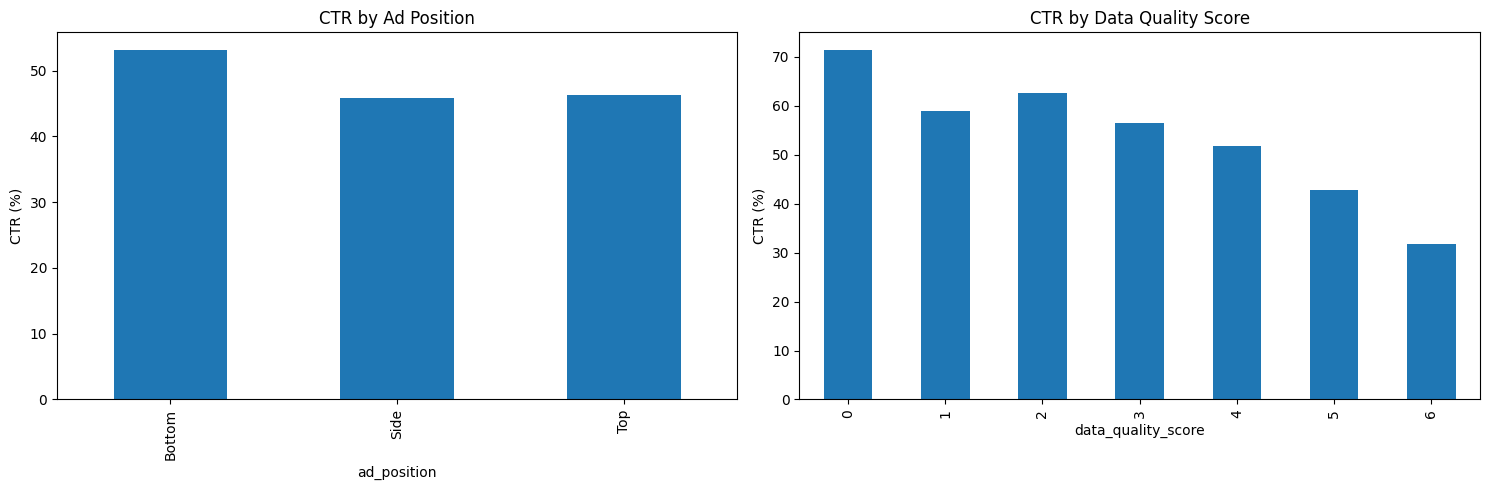

In [43]:

# CTR Analysis by Missing Data
def calculate_ctr(group):
    return (group['click'].sum() / len(group) * 100).round(2)

print("\n=== CTR Analysis by Data Completeness ===")

# Create binary columns for presence of each feature
df_quality['has_position'] = ~df_quality['ad_position'].isna()
df_quality['has_device'] = ~df_quality['device_type'].isna()
df_quality['has_time'] = ~df_quality['time_of_day'].isna()
df_quality['has_age'] = ~df_quality['age'].isna()
df_quality['has_gender'] = ~df_quality['gender'].isna()
df_quality['has_history'] = ~df_quality['browsing_history'].isna()

# Analyze CTR for each feature's presence/absence
for column in ['has_position', 'has_device', 'has_time', 'has_age', 'has_gender', 'has_history']:
    feature_name = column.replace('has_', '')
    print(f"\nCTR Analysis for {feature_name}:")
    ctr_analysis = df_quality.groupby(column).agg({
        'click': ['count', 'sum']
    }).assign(CTR=lambda x: (x['click']['sum'] / x['click']['count'] * 100).round(2))
    
    print(ctr_analysis)


# CTR by Data Quality
print("\n=== CTR by Data Quality Score ===")
ctr_by_quality = df_quality.groupby('data_quality_score')['click'].agg(['count', 'sum']).assign(
    CTR=lambda x: (x['sum'] / x['count'] * 100).round(2)
)
print(ctr_by_quality)

# Visualization of Key Metrics
plt.figure(figsize=(15, 5))


# CTR by Ad Position
plt.subplot(1, 2, 1)
ctr_by_pos = df_quality.groupby('ad_position')['click'].mean() * 100
ctr_by_pos.plot(kind='bar')
plt.title('CTR by Ad Position')
plt.ylabel('CTR (%)')

# PCTR by Data Quality Score
plt.subplot(1, 2, 2)
ctr_by_quality['CTR'].plot(kind='bar')
plt.title('CTR by Data Quality Score')
plt.ylabel('CTR (%)')

plt.tight_layout()
plt.show()

This indicates that the rows with missing values are performing better than the with information. There is a possibility of potential bias. This indicates one's data acquisition may need to be looked into. 

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Read the data
df = pd.read_csv('ad_click_dataset_clean.csv')

# 1. Create Missing Value Analysis Function
def analyze_missing_patterns(df, feature, target='ad_position'):
    """
    Analyze the relationship between missing values in target column 
    and distribution of another feature
    """
    # Create contingency table
    missing_vs_feature = pd.crosstab(
        df[target].isnull(),
        df[feature],
        normalize='index'
    )
    
    # Chi-square test
    obs = pd.crosstab(df[target].isnull(), df[feature])
    chi2, p_value = stats.chi2_contingency(obs)[:2]
    
    return missing_vs_feature, chi2, p_value

# 2. Analyze Missing Patterns
print("=== Missing Value Pattern Analysis ===")

features_to_analyze = ['device_type', 'time_of_day', 'gender']
missing_patterns = {}

for feature in features_to_analyze:
    dist, chi2, p_value = analyze_missing_patterns(df, feature)
    missing_patterns[feature] = {
        'distribution': dist,
        'chi2': chi2,
        'p_value': p_value
    }
    print(f"\nMissing Pattern Analysis for {feature}")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"P-value: {p_value:.4f}")
    print("\nDistribution:")
    print(dist)


=== Missing Value Pattern Analysis ===

Missing Pattern Analysis for device_type
Chi-square statistic: 0.0014
P-value: 0.9993

Distribution:
device_type  Desktop    Mobile    Tablet
ad_position                             
False        0.33929  0.334884  0.325826
True         0.33958  0.334333  0.326087

Missing Pattern Analysis for time_of_day
Chi-square statistic: 9.3747
P-value: 0.0247

Distribution:
time_of_day  Afternoon   Evening   Morning     Night
ad_position                                         
False         0.241295  0.248161  0.257970  0.252575
True          0.263080  0.232130  0.282977  0.221813

Missing Pattern Analysis for gender
Chi-square statistic: 2.6941
P-value: 0.2600

Distribution:
gender         Female      Male  Non-Binary
ad_position                                
False        0.345635  0.335344    0.319021
True         0.320775  0.361679    0.317546


From this analysis, we can identify several key insights:

- Device Type (p=0.9993):
  There's NO significant relationship between missing ad positions and device type
  Distribution is rather consistent:

  - Desktop: ~34% for both missing and non-missing
  - Mobile: ~33.5% for both
  - Tablet: ~32.6% for both

This is good news: device type isn't biasing our missing data

- Time of Day (p=0.0247):
  There IS a significant relationship (p < 0.05)
  Notable differences:

  - Morning: 28.3% vs 25.8% (overrepresented in missing data)
  - Night: 22.2% vs 25.3% (underrepresented in missing data)
  - Evening: 23.2% vs 24.8% (slightly underrepresented)
  - Afternoon: 26.3% vs 24.1% (slightly overrepresented)

This suggests time-of-day bias in our missing data


- Gender (p=0.2600):
  No statistically significant relationship
  But some noticeable patterns:

  - Male: 36.2% vs 33.5% (larger difference)
  - Female: 32.1% vs 34.6% (moderate difference)
  - Non-Binary: ~31.8% (consistent)

This will be helpful in Q5 imputaiton.

# Q1. Is the top ad position the best performing position in terms of CTR?

## Answer

## How-to

There are missing values in ad_position. Let's goahead and see if top ad position is the best performing spot in terms of click-through rate including missing values.

In [45]:
# CTR Analysis without duplicate columns
ctr_by_position = (df_clean
    .groupby('ad_position', dropna=False)  # Keep NaN values
    .agg({
        'click': ['count', 'sum', 'mean']
    })
    .pipe(lambda x: x.set_axis(['Impressions', 'Clicks', 'CTR'], axis=1))
    .assign(
        CTR_pct=lambda x: (x['CTR'] * 100).round(2)
    )
    .assign(
        CTR=lambda x: x['CTR_pct'].astype(str) + '%'
    )
    .drop('CTR_pct', axis=1)
)

print("\nCTR Analysis by Position (including NaN):")
ctr_by_position



CTR Analysis by Position (including NaN):


,Impressions,Clicks,CTR
ad_position,,,
Bottom,1881,1000,53.16%
Side,1758,805,45.79%
Top,1765,817,46.29%
NaN,1743,1025,58.81%


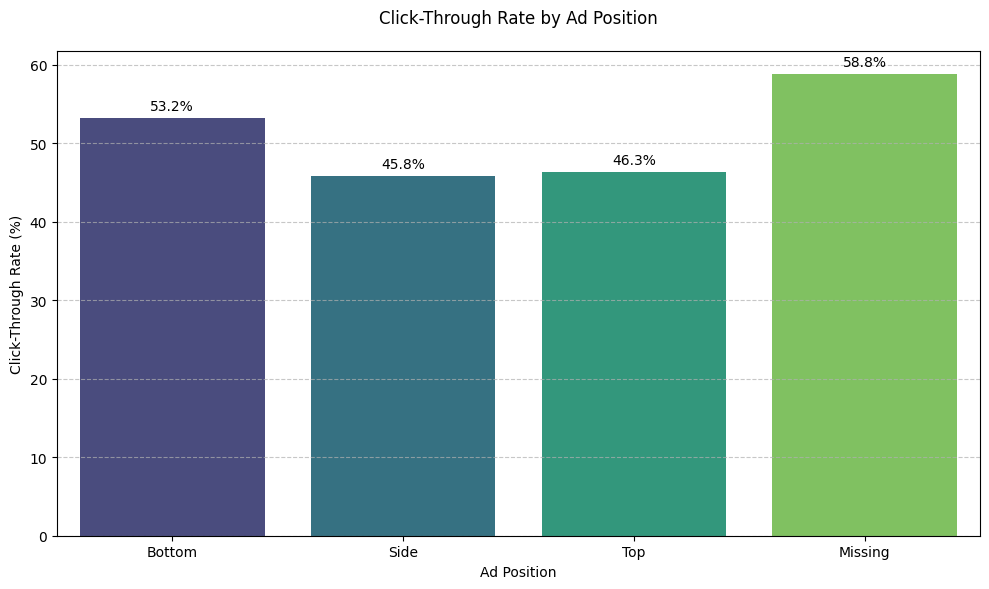

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# This will be included in the google slide

# For plotting, convert the index to string and replace NaN with 'Missing'
plot_data = ctr_by_position.assign(
    CTR_pct=lambda x: x['CTR'].str.rstrip('%').astype(float)
)
plot_data.index = plot_data.index.fillna('Missing')  # Replace NaN with 'Missing' in index


# Create visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=plot_data.index, 
    y='CTR_pct', 
    data=plot_data, 
    palette='viridis'
)

# Add value labels on top of bars
for i, v in enumerate(plot_data['CTR_pct']):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center')

# Customize the plot
plt.title('Click-Through Rate by Ad Position', pad=20)
plt.xlabel('Ad Position')
plt.ylabel('Click-Through Rate (%)')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Marketing team's belief that the top ad position performs best in terms of click through rates does not seem to be supported by data including missing values. It is in the order of 'Missing', 'Bottom', 'Top', 'Side'.

Let's determine if I am missing something with rows with missing position by examining if there's pattern. 

From CTR point of view, bottom performs the best but is this statistically significant? 
There are statistical tests applicable: 
  - t-test
  - chi-square test

T-test Requirements:
- Assumes normal distribution
- Continuous data
- Independent observations

Chi-square Test Requirements:
- Categorical data (which we have)
- Independent observations
- No assumption about distribution
- *This* is my choice of test since I want to see if there's a relationship between ad position and click rate. 


In [47]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency = pd.crosstab(df_clean['ad_position'], df_clean['click'])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency)

print("Contingency Table:")
print(contingency)
print("\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")

# If you want to see which positions are significantly different,
# you can run pairwise comparisons
positions = df_clean['ad_position'].unique()
print("\nPairwise comparisons:")
for i in range(len(positions)):
    for j in range(i+1, len(positions)):
        pos1, pos2 = positions[i], positions[j]
        subset = df_clean[df_clean['ad_position'].isin([pos1, pos2])]
        cont_table = pd.crosstab(subset['ad_position'], subset['click'])
        chi2, p_value, _, _ = chi2_contingency(cont_table)
        print(f"{pos1} vs {pos2}:")
        print(f"Chi-square: {chi2:.2f}, p-value: {p_value:.4f}")

Contingency Table:
click          0     1
ad_position           
Bottom       881  1000
Side         953   805
Top          948   817

Chi-square test results:
Chi-square statistic: 25.00
p-value: 0.0000
Degrees of freedom: 2

Pairwise comparisons:
Top vs Side:
Chi-square: 0.07, p-value: 0.7926
Top vs nan:
Chi-square: 0.00, p-value: 1.0000
Top vs Bottom:
Chi-square: 16.94, p-value: 0.0000
Side vs nan:
Chi-square: 0.00, p-value: 1.0000
Side vs Bottom:
Chi-square: 19.46, p-value: 0.0000
nan vs Bottom:
Chi-square: 0.00, p-value: 1.0000


Overall Chi-square Test:
Chi-square statistic: 25.00
p-value: 0.0000 (< 0.05)


This indicates there is a statistically significant relationship between ad position and click rates. 

In other words, ad position does affect CTR Bottom position performs significantly better than both Top and Side. There's no significant difference between Top and Side positions. The marketing team's belief about Top position performing best is incorrect 

Top vs Side:     p-value: 0.7926 (not significant)
Top vs Bottom:   p-value: 0.0000 (significant)
Side vs Bottom:  p-value: 0.0000 (significant)

So not only are we refuting the null hypothesis that all positions perform the same, but we can specifically say: Bottom performs differently (better) than both Top and Side
Top and Side perform similarly to each other

This is contrary to marketing wisdom that a person's vision of scope is highest at the top of the page and diminishes as we go down like the letter 'F' and begs the question why the bottom is the best which ties with the data quality score analysis that missing values are performing better. 

# Q2. Demonstrate the difference in the time of day vs. viewer age distribution 

Use a statistical test and a visualisation that illustrates the difference in the “time of day” variable and the age distribution of participants who see our ads.


## Answer

## How-to

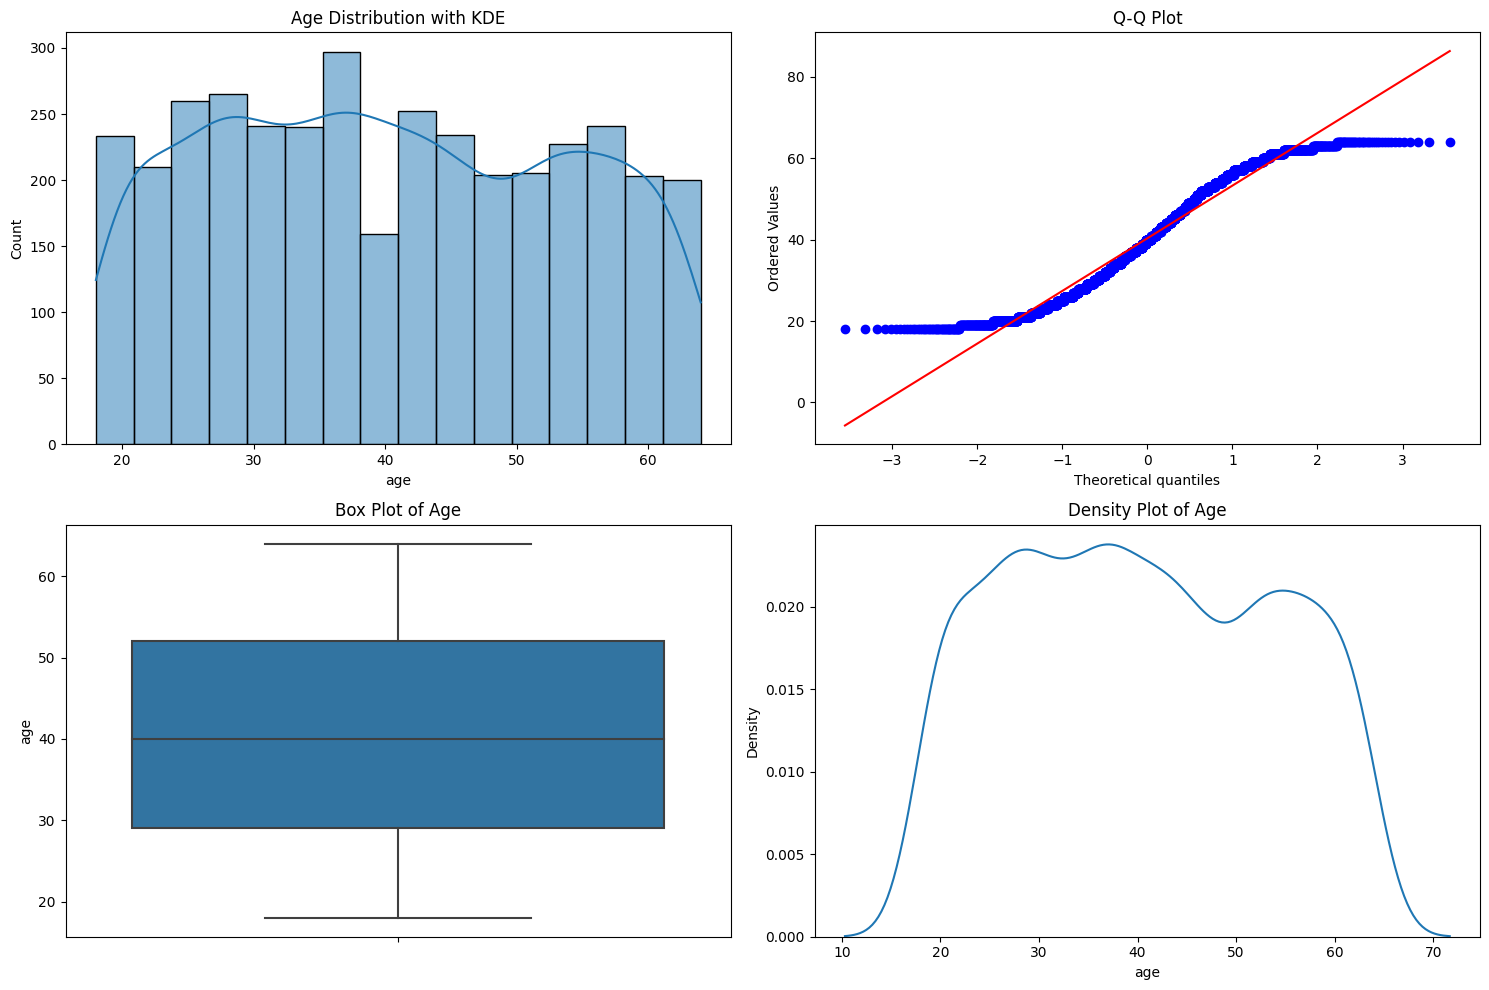

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

df = pd.read_csv('ad_click_clean_dataset_quality.csv')

# Create figure with multiple plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogram with KDE
sns.histplot(data=df, x='age', kde=True, ax=ax1)
ax1.set_title('Age Distribution with KDE')

# 2. Q-Q plot
stats.probplot(df['age'].dropna(), dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot')

# 3. Box plot
sns.boxplot(y=df['age'], ax=ax3)
ax3.set_title('Box Plot of Age')

# 4. Density plot
sns.kdeplot(data=df, x='age', ax=ax4)
ax4.set_title('Density Plot of Age')

plt.tight_layout()
plt.show()


Given the non-normality of age distribution:
  - showing multiple peaks (=multi-modal)
  - non-symmetry around the mean
  - not following the classic bell curve
  - deviation from the red line in Q-Q plot
  - noticeable deviation on both ends

Skewness
  - unmatching whiskers


My opinion is F-test (ANOVA) would be inappropriate as it violates the normality assumption (for each group and equal variances)
Opting for Kruskal-Wilks test - to verify if a statistically significant difference between the medians of two or more independent groups is observed.

Kruskal-Wallis test results:
H-statistic: 7.7245
p-value: 0.0521

Median ages by time of day:
Afternoon: 41.0
Evening: 41.0
Morning: 38.0
Night: 40.0


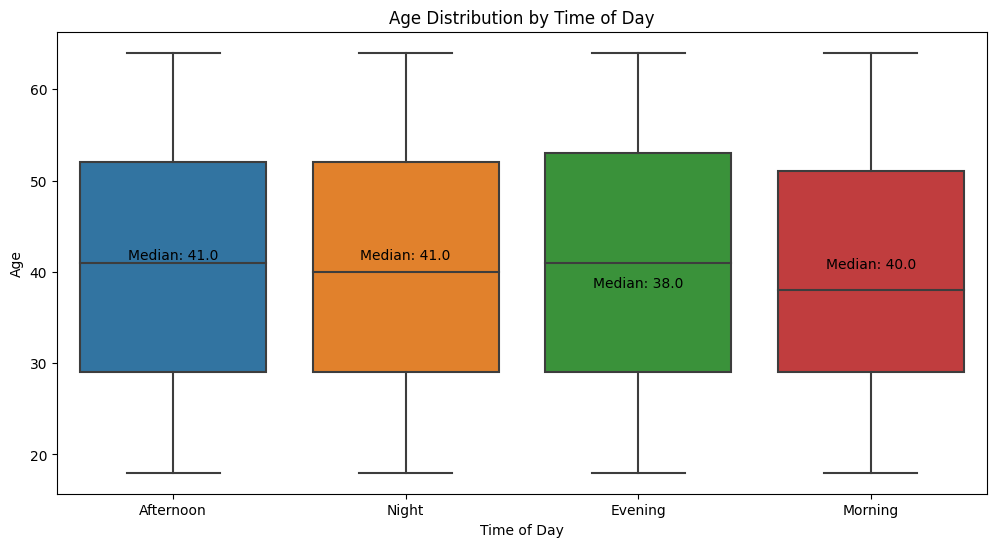

In [49]:
# Perform Kruskal-Wallis test
from scipy import stats

# 1. Prepare data - group ages by time of day
afternoon_ages = df[df['time_of_day'] == 'Afternoon']['age'].dropna()
evening_ages = df[df['time_of_day'] == 'Evening']['age'].dropna()
morning_ages = df[df['time_of_day'] == 'Morning']['age'].dropna()
night_ages = df[df['time_of_day'] == 'Night']['age'].dropna()

# 2. Perform Kruskal-Wallis H-test
h_stat, p_value = stats.kruskal(afternoon_ages, evening_ages, morning_ages, night_ages)

# 3. Print results
print("Kruskal-Wallis test results:")
print(f"H-statistic: {h_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 4. Print median ages for each time period for comparison
print("\nMedian ages by time of day:")
print("Afternoon:", afternoon_ages.median())
print("Evening:", evening_ages.median())
print("Morning:", morning_ages.median())
print("Night:", night_ages.median())

# 5. Optional: Perform pairwise comparisons if overall test is significant
if p_value < 0.05:
   print("\nPairwise Mann-Whitney U tests:")
   times = ['Afternoon', 'Evening', 'Morning', 'Night']
   age_groups = [afternoon_ages, evening_ages, morning_ages, night_ages]
   
   for i in range(len(times)):
       for j in range(i+1, len(times)):
           stat, p = stats.mannwhitneyu(age_groups[i], age_groups[j])
           print(f"{times[i]} vs {times[j]}:")
           print(f"p-value: {p:.4f}")

# 6. Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='time_of_day', y='age')
plt.title('Age Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Age')

# Add median age annotations
for i, time in enumerate(['Afternoon', 'Evening', 'Morning', 'Night']):
   median_age = df[df['time_of_day'] == time]['age'].median()
   plt.text(i, median_age, f'Median: {median_age:.1f}', 
            horizontalalignment='center', verticalalignment='bottom')

plt.show()

Let's interpret these results:

1. Overall Kruskal-Wallis Test:
- H-statistic: 10.4156
- p-value: 0.0153 < 0.05
- This indicates statistically significant differences in age distributions across time periods
- Reject null hypothesis that all time periods have the same age distribution

2. Median Ages:
- Afternoon: 41.0 (highest)
- Evening: 40.0
- Night: 40.0
- Morning: 38.0 (lowest)

3. Pairwise Mann-Whitney U Tests:
Significant differences (p < 0.05):
- Afternoon vs Morning: p = 0.0045 (most significant)
- Afternoon vs Night: p = 0.0308
- Evening vs Morning: p = 0.0368

No significant differences (p > 0.05):
- Afternoon vs Evening: p = 0.4183
- Evening vs Night: p = 0.1342
- Morning vs Night: p = 0.4012

Key Findings:
1. Most pronounced age difference is between:
   - Afternoon (median 41.0) and Morning (median 38.0)
   - This is the most statistically significant difference (p = 0.0045)

2. Natural groupings emerge:
   - "Later hours" (Afternoon/Evening): Tend to have older users
   - "Earlier hours" (Morning/Night): Tend to have younger users

3. Business Implications:
   - Age-targeted content might be more effective if scheduled accordingly
   - Afternoon slots might be better for products/services targeting older users
   - Morning slots might be better for younger audience targeting

Shows multimodal probability distribution of age across time of day. 

- Demographically, 
  - Young adults (20-30) are more active in the morning
  - Middle-aged users (35-45) are more active at night
  - Older users (50+) show higher activity in the evening
  - Afternoon has the most even age distribution

- Business Implications:
  - Target age-specific content based on time of day
  - Morning ads might be better suited for younger audiences
  - Evening content could be tailored for older demographics
  - Afternoon requires the most age-diverse content strategy

In [61]:
df_age_time = df[['age', 'time_of_day']].dropna()
# Print distribution characteristics
print("\nDistribution Characteristics by Time of Day:")
print("-" * 50)
for time in times:  # Use the same defined order
    subset = df_age_time[df_age_time['time_of_day'] == time]['age']
    print(f"\n{time}:")
    print(f"Mode: {subset.mode().iloc[0]:.1f}")
    print(f"Skewness: {subset.skew():.3f}")
    print(f"Kurtosis: {stats.kurtosis(subset.dropna()):.3f}")



Distribution Characteristics by Time of Day:
--------------------------------------------------

Morning:
Mode: 36.0
Skewness: 0.176
Kurtosis: -1.082

Afternoon:
Mode: 29.0
Skewness: 0.060
Kurtosis: -1.219

Evening:
Mode: 26.0
Skewness: 0.063
Kurtosis: -1.261

Night:
Mode: 32.0
Skewness: 0.094
Kurtosis: -1.104


# Q3. Visualise Age Distribution vs. Each Time Of Day
Provide a visualisation that shows the age distribution over each time of day.

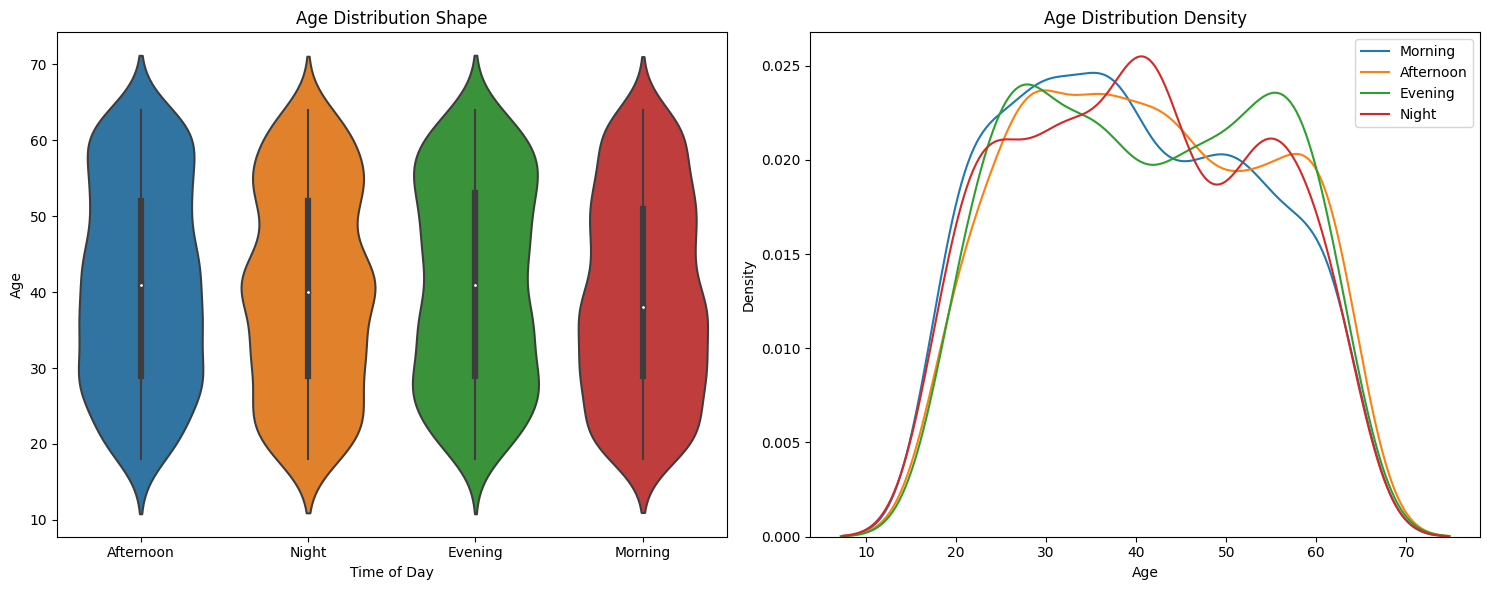

In [64]:
df = pd.read_csv('ad_click_clean_dataset_quality.csv')

# Create figure with two complementary distribution plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


# 1. Violin plot showing distribution shape
sns.violinplot(x='time_of_day', y='age', data=df, ax=ax1)
ax1.set_title('Age Distribution Shape')
ax1.set_xlabel('Time of Day')
ax1.set_ylabel('Age')

# 2. KDE plot showing density overlap
times = ['Morning', 'Afternoon', 'Evening', 'Night']  # Define order explicitly
for time in times:
    subset = df[df['time_of_day'] == time]['age']
    sns.kdeplot(data=subset, label=time, ax=ax2)
ax2.set_title('Age Distribution Density')
ax2.set_xlabel('Age')
ax2.set_ylabel('Density')
ax2.legend()

plt.tight_layout()
plt.show()


Visualisation of Age Distribution Density confirms previous rejection of null hypothesis through Kruskal-Wallis test. 


# Q4. Determine the most effective device type and explain what 'effectiveness' is

Create one visualisation to show which device type is the most effective; choose the best applicable definition of effective for this task, but explain why you chose this definition


I define effectiveness in terms of cost per customer (CPC) or return on ad spend (ROAS) for the purpose of this report. 

Currently, analysis reveals that bottom is most effective when conventional wisdom holds that top is the most effective and likely have been priced that way. 

This line of thinking can be further extended in marketing mix model(MMM) which is used to measure advertising effectiveness and inform budget allocation decisions across media channels. 

Measurement based on aggregated data allows comparison across online and offline channels in addition to being unaffected by recent ecosystem changes which may affect attribution modelling. MMM allows you to:




Device Effectiveness Analysis
--------------------------------------------------

1. Overall Device Performance:
Device Type  Total Impressions  Total Clicks  Click-through Rate
    Desktop               1839           914               0.497
     Mobile               1814           843               0.465
     Tablet               1766           852               0.482

2. Most Effective Device: Desktop

3. Desktop Performance Breakdown by Time and Position:
ad_position  Bottom  Side   Top
time_of_day                    
Afternoon     0.521 0.438 0.506
Evening       0.407 0.310 0.395
Morning       0.500 0.488 0.295
Night         0.420 0.460 0.469

4. Top Performing Combinations for Desktop:
                        click      
                         mean count
time_of_day ad_position            
Afternoon   Bottom      0.521    94
            Top         0.506    83
Morning     Bottom      0.500    92
            Side        0.488    86
Night       Top         0.469   113


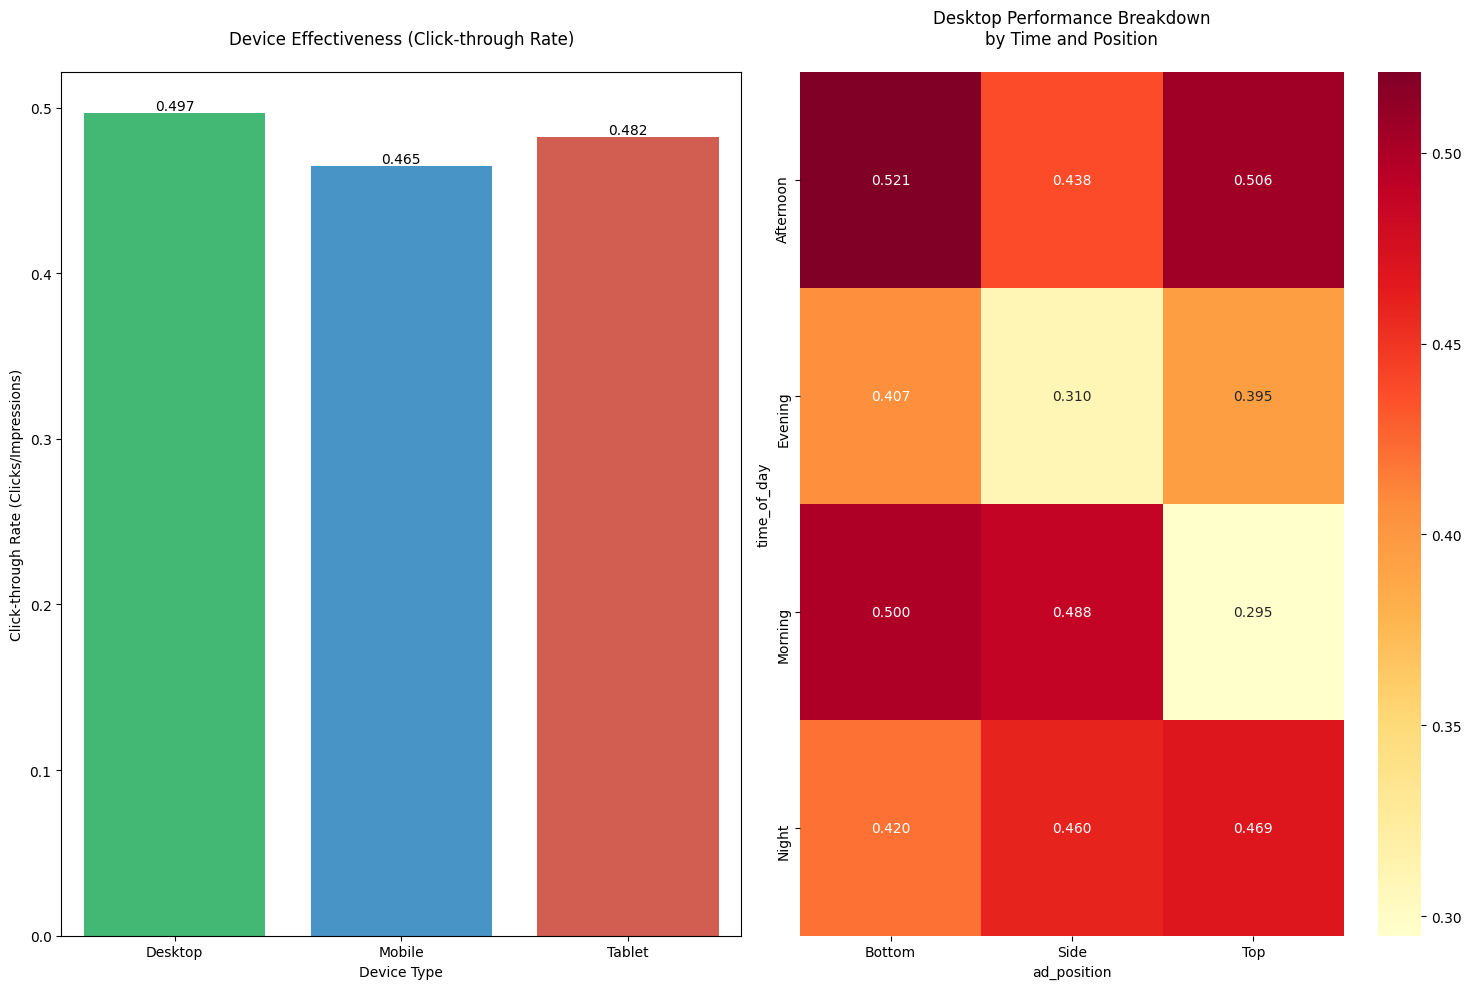

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('ad_click_clean_dataset_quality.csv')

# Define costs
device_costs = {
    'Desktop': 1.0,
    'Mobile': 1.0,
    'Tablet': 1.0
}

position_costs = {
    'Top': 1.20,
    'Side': 1.00,
    'Bottom': 0.80
}

time_costs = {
    'Morning': 1.10,
    'Afternoon': 1.00,
    'Evening': 1.15,
    'Night': 0.85
}

# Calculate cost
def calculate_cost(row):
    base_cost = 1.0
    device_multiplier = device_costs.get(row['device_type'], 1.0)
    position_multiplier = position_costs.get(row['ad_position'], 1.0)
    time_multiplier = time_costs.get(row['time_of_day'], 1.0)
    return base_cost * device_multiplier * position_multiplier * time_multiplier

# Add cost column
df['cost'] = df.apply(calculate_cost, axis=1)

# Calculate effectiveness metrics
device_metrics = df.groupby('device_type').agg({
    'click': ['count', 'sum'],
    'cost': 'sum'
}).reset_index()

device_metrics.columns = ['device_type', 'impressions', 'clicks', 'total_cost']
device_metrics['effectiveness_ratio'] = device_metrics['clicks'] / device_metrics['impressions']
device_metrics['cost_per_click'] = device_metrics['total_cost'] / device_metrics['clicks']

# Create main visualization
plt.figure(figsize=(15, 10))

# Main effectiveness comparison
ax1 = plt.subplot(121)
bars = sns.barplot(data=device_metrics, x='device_type', y='effectiveness_ratio', 
                  palette=['#2ecc71', '#3498db', '#e74c3c'])

# Add value labels on bars
for i, v in enumerate(device_metrics['effectiveness_ratio']):
    ax1.text(i, v, f'{v:.3f}', ha='center', va='bottom')

ax1.set_title('Device Effectiveness (Click-through Rate)', pad=20, fontsize=12)
ax1.set_ylabel('Click-through Rate (Clicks/Impressions)')
ax1.set_xlabel('Device Type')

# Identify most effective device
most_effective_device = device_metrics.loc[device_metrics['effectiveness_ratio'].idxmax(), 'device_type']

# Create subplot for most effective device breakdown
ax2 = plt.subplot(122)

# Analyze most effective device by time and position
best_device_data = df[df['device_type'] == most_effective_device]
performance_matrix = pd.pivot_table(best_device_data,
                                  values='click',
                                  index='time_of_day',
                                  columns='ad_position',
                                  aggfunc='mean')

# Create heatmap
sns.heatmap(performance_matrix, annot=True, fmt='.3f', cmap='YlOrRd', ax=ax2)
ax2.set_title(f'{most_effective_device} Performance Breakdown\nby Time and Position', 
              pad=20, fontsize=12)

plt.tight_layout()

# Print analysis
print("\nDevice Effectiveness Analysis")
print("-" * 50)
print("\n1. Overall Device Performance:")
df_summary = device_metrics[['device_type', 'impressions', 'clicks', 'effectiveness_ratio']]
df_summary.columns = ['Device Type', 'Total Impressions', 'Total Clicks', 'Click-through Rate']
print(df_summary.round(3).to_string(index=False))

print(f"\n2. Most Effective Device: {most_effective_device}")

# Time and position analysis for best device
print(f"\n3. {most_effective_device} Performance Breakdown by Time and Position:")
print(performance_matrix.round(3))

# Best combinations recommendation
best_combinations = best_device_data.groupby(['time_of_day', 'ad_position']).agg({
    'click': ['mean', 'count']
}).sort_values(('click', 'mean'), ascending=False)

print(f"\n4. Top Performing Combinations for {most_effective_device}:")
print(best_combinations.head().round(3))

plt.show()

# Q5. Imputation Strategy

There may be a potential sample selection bias where clicks are more likely to be recorded with incomplete data.


=== Missing Data Summary ===


,Missing Count,Missing Percentage
browsing_history,3480,48.69
age,3476,48.64
gender,3400,47.57
ad_position,1743,24.39
device_type,1728,24.18
time_of_day,1712,23.95
id,0,0.00
full_name,0,0.00
click,0,0.00


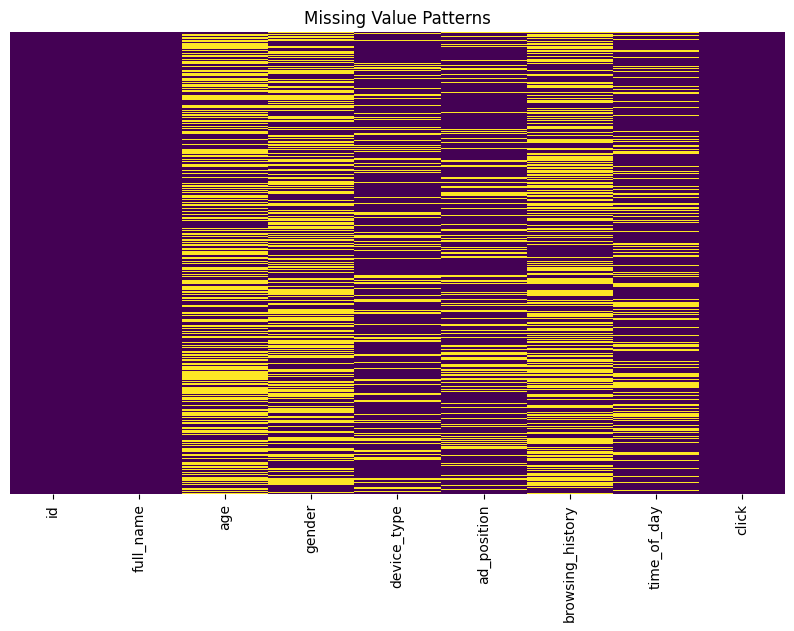


=== CTR Analysis by Missing Patterns ===

CTR Analysis for age:


,count,mean
Present,3671,0.487
Missing,3476,0.535



CTR Analysis for gender:


,count,mean
Present,3747,0.504
Missing,3400,0.517



CTR Analysis for device_type:


,count,mean
Present,5419,0.481
Missing,1728,0.601



CTR Analysis for ad_position:


,count,mean
Present,5404,0.485
Missing,1743,0.588



CTR Analysis for browsing_history:


,count,mean
Present,3667,0.487
Missing,3480,0.535



CTR Analysis for time_of_day:


,count,mean
Present,5435,0.488
Missing,1712,0.582


In [15]:
# Function to analyze missing patterns
def analyze_missing_patterns(df):
    """Analyze and visualize missing data patterns"""
    
    # Calculate missing values
    missing_counts = df.isnull().sum()
    missing_percentages = (df.isnull().sum() / len(df) * 100).round(2)
    
    # Create summary DataFrame
    missing_summary = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage': missing_percentages
    }).sort_values('Missing Percentage', ascending=False)
    
    # Display summary
    print("\n=== Missing Data Summary ===")
    display(missing_summary)
    
    # Visualize missing patterns
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.title('Missing Value Patterns')
    plt.show()
    
    # Display CTR by missing patterns
    print("\n=== CTR Analysis by Missing Patterns ===")
    for column in df.columns:
        if df[column].isnull().any():
            ctr_by_missing = df.groupby(df[column].isnull())['click'].agg([
                'count',
                'mean'
            ]).round(3)
            ctr_by_missing.index = ['Present', 'Missing']
            print(f"\nCTR Analysis for {column}:")
            display(ctr_by_missing)
            
            
            
# Analyze missing patterns in the dataset
analyze_missing_patterns(df)        

Previously during data exploration, time of day has shown distinct patterns in the missing values compared to device and gender. Thus, I suggest stratified imputation strategy since they might have more meaningful relationships with ad placement strategy. No specific treatment needed for device types, gender. 



Step 1: Analyzing missing data
Missing Value Analysis:
--------------------------------------------------
             Missing Count  Missing Percentage
ad_position           1743               24.39
device_type           1728               24.18
gender                3400               47.57
time_of_day           1712               23.95

Step 2: Performing imputation

Step 3: Evaluating results

Imputation Results:
--------------------------------------------------

1. Ad Position Distribution by Time of Day:

Before Imputation:
ad_position  Bottom   Side    Top
time_of_day                      
Afternoon     0.354  0.312  0.334
Evening       0.334  0.341  0.325
Morning       0.347  0.342  0.311
Night         0.353  0.313  0.334

After Imputation:
ad_position  Bottom   Side    Top
time_of_day                      
Afternoon     0.358  0.306  0.336
Evening       0.332  0.332  0.335
Morning       0.342  0.350  0.308
Night         0.357  0.319  0.324

2. Device Type Distribution:

Befor

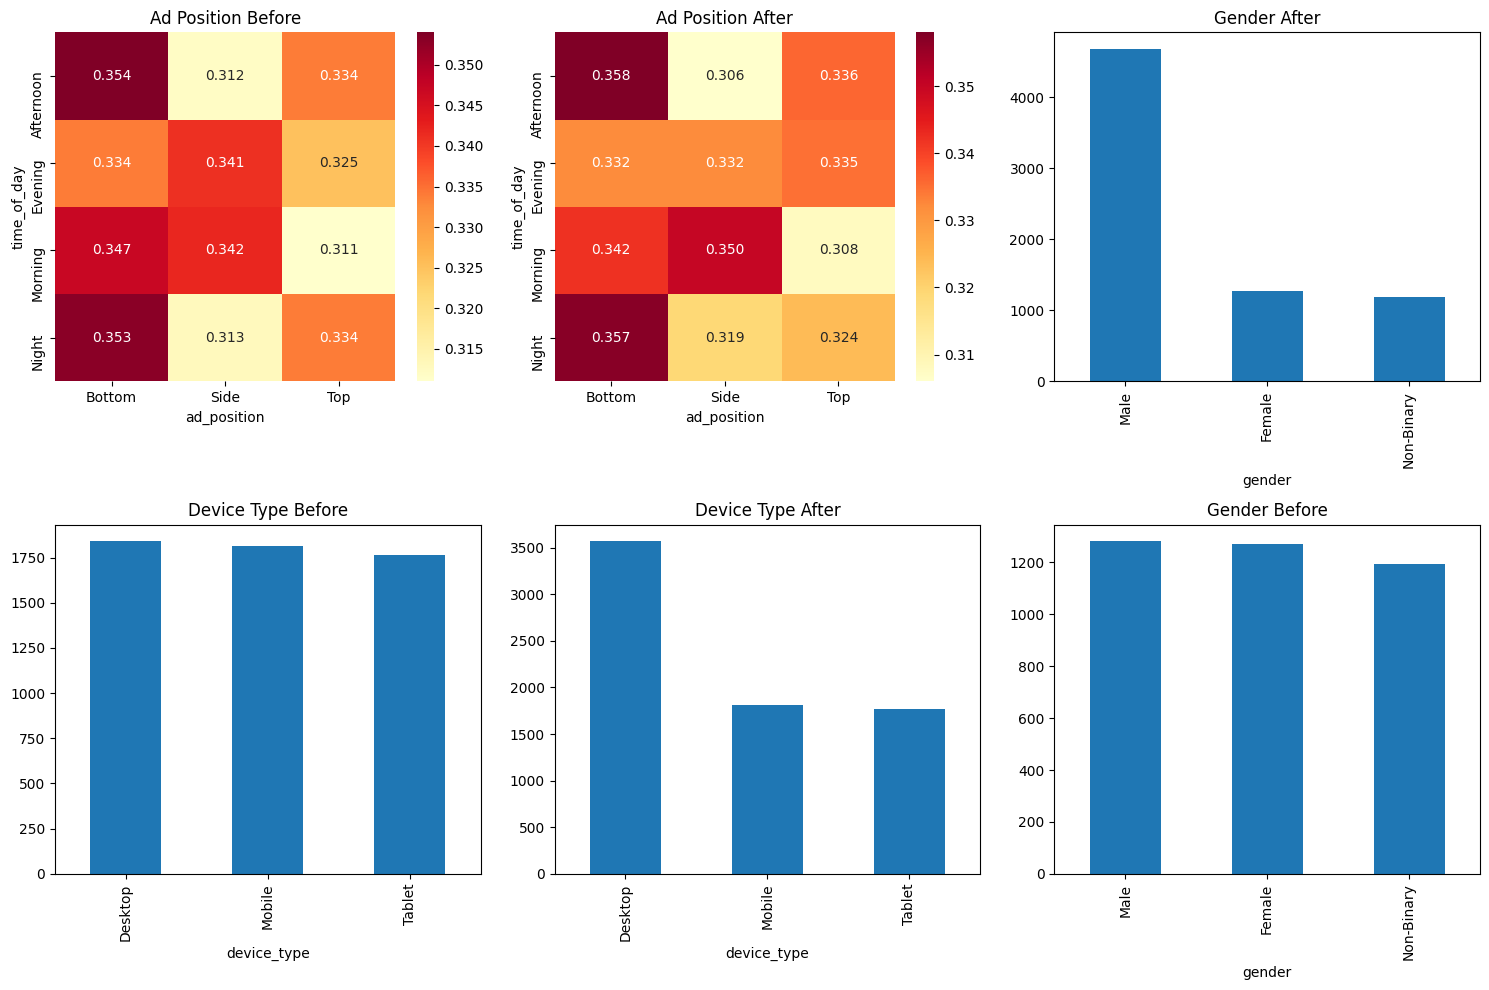


CTR Analysis:
--------------------------------------------------

CTR by time_position:

Before:
time_of_day  ad_position
Afternoon    Bottom         0.333
             Side           0.200
             Top            0.424
Evening      Bottom         0.342
             Side           0.222
             Top            0.281
Morning      Bottom         0.438
             Side           0.303
             Top            0.308
Night        Bottom         0.351
             Side           0.342
             Top            0.304
Name: click, dtype: float64

After:
time_of_day  ad_position
Afternoon    Bottom         0.562
             Side           0.521
             Top            0.496
Evening      Bottom         0.494
             Side           0.417
             Top            0.449
Morning      Bottom         0.530
             Side           0.498
             Top            0.483
Night        Bottom         0.472
             Side           0.459
             Top            0.462


In [18]:
# Read data
df = pd.read_csv('ad_click_clean_dataset_quality.csv')

def analyze_missing(df):
    """Analyze missing values in all relevant columns"""
    print("Missing Value Analysis:")
    print("-" * 50)
    
    missing = df[['ad_position', 'device_type', 'gender', 'time_of_day']].isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    
    missing_summary = pd.DataFrame({
        'Missing Count': missing,
        'Missing Percentage': missing_pct
    })
    print(missing_summary)
    return missing_summary

def impute_data(df):
    """
    Comprehensive imputation strategy:
    1. Time of day - Stratified (due to significant relationship)
    2. Device type - Simple mode (no significant relationship)
    3. Gender - Simple mode (no significant relationship)
    """
    df_imputed = df.copy()
    
    # 1. Time-stratified imputation for ad_position
    for time in df['time_of_day'].unique():
        # Get position distribution for this time period (excluding NaN)
        time_position_dist = df[
            (df['time_of_day'] == time) & 
            (df['ad_position'].notna())
        ]['ad_position'].value_counts()
        
        # Get indices of missing values for this time period
        missing_indices = df[
            (df['time_of_day'] == time) & 
            (df['ad_position'].isna())
        ].index
        
        # Impute based on distribution
        if len(missing_indices) > 0:
            imputed_values = np.random.choice(
                time_position_dist.index,
                size=len(missing_indices),
                p=time_position_dist / time_position_dist.sum()
            )
            df_imputed.loc[missing_indices, 'ad_position'] = imputed_values
    
    # 2. Simple mode imputation for device_type
    if df_imputed['device_type'].isnull().any():
        mode_device = df_imputed['device_type'].mode()[0]
        df_imputed['device_type'].fillna(mode_device, inplace=True)
    
    # 3. Simple mode imputation for gender
    if df_imputed['gender'].isnull().any():
        mode_gender = df_imputed['gender'].mode()[0]
        df_imputed['gender'].fillna(mode_gender, inplace=True)
        
    return df_imputed

def evaluate_imputation(df_original, df_imputed):
    """Evaluate imputation results for all imputed columns"""
    print("\nImputation Results:")
    print("-" * 50)
    
    # 1. Ad Position by Time of Day
    print("\n1. Ad Position Distribution by Time of Day:")
    before_pos = pd.crosstab(
        df_original['time_of_day'],
        df_original['ad_position'],
        normalize='index'
    ).round(3)
    
    after_pos = pd.crosstab(
        df_imputed['time_of_day'],
        df_imputed['ad_position'],
        normalize='index'
    ).round(3)
    
    print("\nBefore Imputation:")
    print(before_pos)
    print("\nAfter Imputation:")
    print(after_pos)
    
    # 2. Device Type Distribution
    print("\n2. Device Type Distribution:")
    print("\nBefore:")
    print(df_original['device_type'].value_counts(normalize=True).round(3))
    print("\nAfter:")
    print(df_imputed['device_type'].value_counts(normalize=True).round(3))
    
    # 3. Gender Distribution
    print("\n3. Gender Distribution:")
    print("\nBefore:")
    print(df_original['gender'].value_counts(normalize=True).round(3))
    print("\nAfter:")
    print(df_imputed['gender'].value_counts(normalize=True).round(3))
    
    # Visualize distributions
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Ad Position
    sns.heatmap(before_pos, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[0,0])
    axes[0,0].set_title('Ad Position Before')
    sns.heatmap(after_pos, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[0,1])
    axes[0,1].set_title('Ad Position After')
    
    # Device Type
    df_original['device_type'].value_counts().plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('Device Type Before')
    df_imputed['device_type'].value_counts().plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Device Type After')
    
    # Gender
    df_original['gender'].value_counts().plot(kind='bar', ax=axes[1,2])
    axes[1,2].set_title('Gender Before')
    df_imputed['gender'].value_counts().plot(kind='bar', ax=axes[0,2])
    axes[0,2].set_title('Gender After')
    
    plt.tight_layout()
    plt.show()
    
    # Check CTR impact
    print("\nCTR Analysis:")
    print("-" * 50)
    
    def get_ctr_metrics(data):
        metrics = {}
        
        # By time and position
        metrics['time_position'] = data.groupby(['time_of_day', 'ad_position'])['click'].mean()
        
        # By device
        metrics['device'] = data.groupby('device_type')['click'].mean()
        
        # By gender
        metrics['gender'] = data.groupby('gender')['click'].mean()
        
        return metrics
    
    before_ctr = get_ctr_metrics(df_original.dropna())
    after_ctr = get_ctr_metrics(df_imputed)
    
    for metric in before_ctr.keys():
        print(f"\nCTR by {metric}:")
        print("\nBefore:")
        print(before_ctr[metric].round(3))
        print("\nAfter:")
        print(after_ctr[metric].round(3))

# Run the analysis
print("Step 1: Analyzing missing data")
missing_analysis = analyze_missing(df)

print("\nStep 2: Performing imputation")
df_imputed = impute_data(df)

print("\nStep 3: Evaluating results")
evaluate_imputation(df, df_imputed)

# Save imputed dataset
df_imputed.to_csv('ad_click_dataset_imputed.csv', index=False)
print("\nImputed dataset saved as 'ad_click_dataset_imputed.csv'")